In [1]:
import pandas as pd
import numpy as np
import warnings as wr
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

wr.filterwarnings("ignore")

In [2]:
loc_lbl = r"D:\Documentos\Facu\Organizacion de Datos\TP2\Labels"
loc_ftr = r"D:\Documentos\Facu\Organizacion de Datos\TP2\Features\ftr_ins"

In [3]:
ins_lb = pd.read_csv( loc_lbl + "\\ins_lb.csv", dtype = {"obs_18_20":"bool", "obs_21_23":"bool", "obs_24_26":"bool"} )

### Filtro de manera que tenga los datos necesarios

In [4]:
rh_18_20 = pd.read_csv( "D:\Documentos\Facu\Organizacion de Datos\TP2\Training Sets\ins_18_20.csv" ); rh_18_20 = rh_18_20["ref_hash"].drop_duplicates().tolist()
rh_21_23 = pd.read_csv( "D:\Documentos\Facu\Organizacion de Datos\TP2\Training Sets\ins_21_23.csv" ); rh_21_23 = rh_21_23["ref_hash"].drop_duplicates().tolist()

In [5]:
dt_18_20 = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_18_20 ), ["ref_hash"] ] #Datos del (18-20)
sc_21_23 = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_18_20 ), ["ref_hash", "21_23_sc"] ] #SC del (21-23)

dt_21_23 = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_21_23 ), ["ref_hash"] ] #Datos del (21-23)
sc_24_26 = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_21_23 ), ["24_26_sc"] ] #SC del (24-26)

# <span style="color:orange">  Preparo los datos para predecir </span>
Con los datos 21-23 predecimos "24-26_sc"

In [19]:
Z_var = dt_21_23
W_var = sc_24_26

### Agregamos los features 

In [20]:
ftr_01_Z = pd.read_csv( loc_ftr + "\\sin_hour_21_23.csv" )  ; Z_var = Z_var.merge( ftr_01_Z, how = "inner", on = "ref_hash" )
ftr_02_z = pd.read_csv( loc_ftr + "\\sin_wday_21_23.csv")   ; Z_var = Z_var.merge(  ftr_02_z, how = "inner", on = "ref_hash")
ftr_03_z = pd.read_csv( loc_ftr + "\\cant_imp_21_23.csv")   ; Z_var = Z_var.merge(  ftr_03_z, how = "inner", on = "ref_hash")
ftr_04_z = pd.read_csv( loc_ftr + "\\cant_app_ins_21_23.csv") ; Z_var = Z_var.merge(  ftr_04_z, how = "inner", on = "ref_hash")
ftr_05_z = pd.read_csv( loc_ftr + "\\app_id_21_23.csv")     ; Z_var = Z_var.merge(  ftr_05_z, how = "inner", on = "ref_hash")
ftr_06_z = pd.read_csv( loc_ftr + "\\sin_hour_21_23.csv")   ; Z_var = Z_var.merge(  ftr_06_z, how = "inner", on = "ref_hash")
ftr_07_z = pd.read_csv( loc_ftr + "\\hr_f_evt_21_23.csv")   ; Z_var = Z_var.merge(  ftr_07_z, how = "inner", on = "ref_hash")
ftr_08_z = pd.read_csv( loc_ftr + "\\main_ihr_21_23.csv")   ; Z_var = Z_var.merge(  ftr_08_z, how = "inner", on = "ref_hash")
ftr_09_z = pd.read_csv( loc_ftr + "\\main_ahr_21_23.csv")   ; Z_var = Z_var.merge(  ftr_09_z, how = "inner", on = "ref_hash")
ftr_10_z = pd.read_csv( loc_ftr + "\\hr_f_auc_21_23.csv")   ; Z_var = Z_var.merge(  ftr_10_z, how = "inner", on = "ref_hash")
ftr_11_z = pd.read_csv( loc_ftr + "\\cant_ins_21_23.csv")   ; Z_var = Z_var.merge(  ftr_11_z, how = "inner", on = "ref_hash")
ftr_12_z = pd.read_csv( loc_ftr + "\\cant_evt_21_23.csv")   ; Z_var = Z_var.merge(  ftr_12_z, how = "inner", on = "ref_hash")
ftr_13_z = pd.read_csv( loc_ftr + "\\cant_auc_21_23.csv")   ; Z_var = Z_var.merge(  ftr_13_z, how = "inner", on = "ref_hash")
ftr_14_z = pd.read_csv( loc_ftr + "\\ip_encod_21_23.csv")   ; Z_var = Z_var.merge(  ftr_14_z, how = "inner", on = "ref_hash")
ftr_15_z = pd.read_csv( loc_ftr + "\\wifi_ins_21_23.csv")   ; Z_var = Z_var.merge(  ftr_15_z, how = "inner", on = "ref_hash")
ftr_16_z = pd.read_csv( loc_ftr + "\\main_app_21_23.csv")   ; Z_var = Z_var.merge(  ftr_16_z, how = "inner", on = "ref_hash")
ftr_17_z = pd.read_csv( loc_ftr + "\\cins_imp_21_23.csv")   ; Z_var = Z_var.merge(  ftr_17_z, how = "inner", on = "ref_hash")
ftr_18_z = pd.read_csv( loc_ftr + "\\type_ins_21_23.csv")   ; Z_var = Z_var.merge(  ftr_18_z, how = "inner", on = "ref_hash")
ftr_19_z = pd.read_csv( loc_ftr + "\\ref_type_21_23.csv")   ; Z_var = Z_var.merge(  ftr_19_z, how = "inner", on = "ref_hash")
ftr_20_z = pd.read_csv( loc_ftr + "\\cins_atr_21_23.csv")   ; Z_var = Z_var.merge(  ftr_20_z, how = "inner", on = "ref_hash")
ftr_21_z = pd.read_csv( loc_ftr + "\\frst_auc_21_23.csv")   ; Z_var = Z_var.merge(  ftr_21_z, how = "inner", on = "ref_hash")
ftr_22_z = pd.read_csv( loc_ftr + "\\frst_evt_21_23.csv")   ; Z_var = Z_var.merge(  ftr_22_z, how = "inner", on = "ref_hash")
ftr_23_z = pd.read_csv( loc_ftr + "\\frst_evt_21_23.csv")   ; Z_var = Z_var.merge(  ftr_23_z, how = "inner", on = "ref_hash")
ftr_24_z = pd.read_csv( loc_ftr + "\\cant_clk_21_23.csv")   ; Z_var = Z_var.merge(  ftr_24_z, how = "inner", on = "ref_hash")
ftr_25_z = pd.read_csv( loc_ftr + "\\dev_lang_21_23.csv")   ; Z_var = Z_var.merge(  ftr_25_z, how = "inner", on = "ref_hash")
ftr_26_z = pd.read_csv( loc_ftr + "\\dev_modl_21_23.csv")   ; Z_var = Z_var.merge(  ftr_26_z, how = "inner", on = "ref_hash")
ftr_27_z = pd.read_csv( loc_ftr + "\\ins_dsua_21_23.csv")   ; Z_var = Z_var.merge(  ftr_27_z, how = "inner", on = "ref_hash")
ftr_28_z = pd.read_csv( loc_ftr + "\\srce_auc_21_23.csv")   ; Z_var = Z_var.merge(  ftr_28_z, how = "inner", on = "ref_hash")
ftr_29_z = pd.read_csv( loc_ftr + "\\rh_encod_21_23.csv")   ; Z_var = Z_var.merge(  ftr_29_z, how = "inner", on = "ref_hash")
ftr_30_z = pd.read_csv( loc_ftr + "\\atbt_ins_21_23.csv")   ; Z_var = Z_var.merge(  ftr_30_z, how = "inner", on = "ref_hash")
ftr_31_z = pd.read_csv( loc_ftr + "\\kind_evt_21_23.csv")   ; Z_var = Z_var.merge(  ftr_31_z, how = "inner", on = "ref_hash")
ftr_32_z = pd.read_csv( loc_ftr + "\\cevt_atr_21_23.csv")   ; Z_var = Z_var.merge(  ftr_32_z, how = "inner", on = "ref_hash")
ftr_33_z = pd.read_csv( loc_ftr + "\\mapp_evt_21_23.csv")   ; Z_var = Z_var.merge(  ftr_33_z, how = "inner", on = "ref_hash")
ftr_34_z = pd.read_csv( loc_ftr + "\\wifi_evt_21_23.csv")   ; Z_var = Z_var.merge(  ftr_34_z, how = "inner", on = "ref_hash")
ftr_35_z = pd.read_csv( loc_ftr + "\\frst_ins_21_23.csv")   ; Z_var = Z_var.merge(  ftr_35_z, how = "inner", on = "ref_hash")
ftr_36_z = pd.read_csv( loc_ftr + "\\frst_clk_21_23.csv")   ; Z_var = Z_var.merge(  ftr_36_z, how = "inner", on = "ref_hash")
ftr_37_z = pd.read_csv( loc_ftr + "\\last_ins_21_23.csv")   ; Z_var = Z_var.merge(  ftr_37_z, how = "inner", on = "ref_hash")
ftr_38_z = pd.read_csv( loc_ftr + "\\last_auc_21_23.csv")   ; Z_var = Z_var.merge(  ftr_38_z, how = "inner", on = "ref_hash")
ftr_39_z = pd.read_csv( loc_ftr + "\\last_evt_21_23.csv")   ; Z_var = Z_var.merge(  ftr_39_z, how = "inner", on = "ref_hash")
ftr_40_z = pd.read_csv( loc_ftr + "\\last_clk_21_23.csv")   ; Z_var = Z_var.merge(  ftr_40_z, how = "inner", on = "ref_hash")
ftr_41_z = pd.read_csv( loc_ftr + "\\mt_1_ins_21_23.csv")   ; Z_var = Z_var.merge(  ftr_41_z, how = "inner", on = "ref_hash")
ftr_42_z = pd.read_csv( loc_ftr + "\\ins_night_21_23.csv")  ; Z_var = Z_var.merge(  ftr_42_z, how = "inner", on = "ref_hash")
ftr_43_z = pd.read_csv( loc_ftr + "\\ins_morn_21_23.csv")   ; Z_var = Z_var.merge(  ftr_43_z, how = "inner", on = "ref_hash")
ftr_44_z = pd.read_csv( loc_ftr + "\\ins_midday_21_23.csv") ; Z_var = Z_var.merge(  ftr_44_z, how = "inner", on = "ref_hash")
ftr_45_z = pd.read_csv( loc_ftr + "\\ins_after_21_23.csv")  ; Z_var = Z_var.merge(  ftr_45_z, how = "inner", on = "ref_hash")
ftr_46_z = pd.read_csv( loc_ftr + "\\auc_night_21_23.csv")  ; Z_var = Z_var.merge(  ftr_46_z, how = "inner", on = "ref_hash")
ftr_47_z = pd.read_csv( loc_ftr + "\\auc_morn_21_23.csv")   ; Z_var = Z_var.merge(  ftr_47_z, how = "inner", on = "ref_hash")
ftr_48_z = pd.read_csv( loc_ftr + "\\auc_midday_21_23.csv") ; Z_var = Z_var.merge(  ftr_48_z, how = "inner", on = "ref_hash")
ftr_49_z = pd.read_csv( loc_ftr + "\\auc_after_21_23.csv")  ; Z_var = Z_var.merge(  ftr_49_z, how = "inner", on = "ref_hash")
ftr_50_z = pd.read_csv( loc_ftr + "\\evt_night_21_23.csv")  ; Z_var = Z_var.merge(  ftr_50_z, how = "inner", on = "ref_hash")
ftr_51_z = pd.read_csv( loc_ftr + "\\evt_morn_21_23.csv")   ; Z_var = Z_var.merge(  ftr_51_z, how = "inner", on = "ref_hash")
ftr_52_z = pd.read_csv( loc_ftr + "\\evt_midday_21_23.csv") ; Z_var = Z_var.merge(  ftr_52_z, how = "inner", on = "ref_hash")
ftr_53_z = pd.read_csv( loc_ftr + "\\evt_after_21_23.csv")  ; Z_var = Z_var.merge(  ftr_53_z, how = "inner", on = "ref_hash")
ftr_54_z = pd.read_csv( loc_ftr + "\\auc_night_21_23.csv")  ; Z_var = Z_var.merge(  ftr_54_z, how = "inner", on = "ref_hash")
ftr_55_z = pd.read_csv( loc_ftr + "\\auc_morn_21_23.csv")   ; Z_var = Z_var.merge(  ftr_55_z, how = "inner", on = "ref_hash")
ftr_56_z = pd.read_csv( loc_ftr + "\\auc_midday_21_23.csv") ; Z_var = Z_var.merge(  ftr_56_z, how = "inner", on = "ref_hash")
ftr_57_z = pd.read_csv( loc_ftr + "\\auc_after_21_23.csv")  ; Z_var = Z_var.merge(  ftr_57_z, how = "inner", on = "ref_hash")

# <span style="color:orange">  Preparo los datos para entrenar </span>

Con los datos 18-20 + "21-23_sc" entrenamos

In [24]:
Y_var = sc_21_23

In [25]:
X_var = dt_18_20

### Agregamos los features

In [26]:
ftr_01_x = pd.read_csv( loc_ftr + "\\sin_hour_18_20.csv") ; X_var = X_var.merge( ftr_01_x, how = "inner", on = "ref_hash" )
ftr_02_x = pd.read_csv( loc_ftr + "\\sin_wday_18_20.csv")  ; X_var = X_var.merge(  ftr_02_x, how = "inner", on = "ref_hash")
ftr_03_x = pd.read_csv( loc_ftr + "\\cant_imp_18_20.csv")  ; X_var = X_var.merge(  ftr_03_x, how = "inner", on = "ref_hash")
ftr_04_x = pd.read_csv( loc_ftr + "\\cant_app_ins_18_20.csv") ; X_var = X_var.merge(  ftr_04_x, how = "inner", on = "ref_hash")
ftr_05_x = pd.read_csv( loc_ftr + "\\app_id_18_20.csv")    ; X_var = X_var.merge(  ftr_05_x, how = "inner", on = "ref_hash")
ftr_06_x = pd.read_csv( loc_ftr + "\\sin_hour_18_20.csv")  ; X_var = X_var.merge(  ftr_06_x, how = "inner", on = "ref_hash")
ftr_07_x = pd.read_csv( loc_ftr + "\\hr_f_evt_18_20.csv")  ; X_var = X_var.merge(  ftr_07_x, how = "inner", on = "ref_hash")
ftr_08_x = pd.read_csv( loc_ftr + "\\main_ihr_18_20.csv")  ; X_var = X_var.merge(  ftr_08_x, how = "inner", on = "ref_hash")
ftr_09_x = pd.read_csv( loc_ftr + "\\main_ahr_18_20.csv")  ; X_var = X_var.merge(  ftr_09_x, how = "inner", on = "ref_hash")
ftr_10_x = pd.read_csv( loc_ftr + "\\hr_f_auc_18_20.csv")  ; X_var = X_var.merge(  ftr_10_x, how = "inner", on = "ref_hash")
ftr_11_x = pd.read_csv( loc_ftr + "\\cant_ins_18_20.csv")  ; X_var = X_var.merge(  ftr_11_x, how = "inner", on = "ref_hash")
ftr_12_x = pd.read_csv( loc_ftr + "\\cant_evt_18_20.csv")  ; X_var = X_var.merge(  ftr_12_x, how = "inner", on = "ref_hash")
ftr_13_x = pd.read_csv( loc_ftr + "\\cant_auc_18_20.csv")  ; X_var = X_var.merge(  ftr_13_x, how = "inner", on = "ref_hash")
ftr_14_x = pd.read_csv( loc_ftr + "\\ip_encod_18_20.csv")  ; X_var = X_var.merge(  ftr_14_x, how = "inner", on = "ref_hash")
ftr_15_x = pd.read_csv( loc_ftr + "\\wifi_ins_18_20.csv")  ; X_var = X_var.merge(  ftr_15_x, how = "inner", on = "ref_hash")
ftr_16_x = pd.read_csv( loc_ftr + "\\main_app_18_20.csv")  ; X_var = X_var.merge(  ftr_16_x, how = "inner", on = "ref_hash")
ftr_17_x = pd.read_csv( loc_ftr + "\\cins_imp_18_20.csv")  ; X_var = X_var.merge(  ftr_17_x, how = "inner", on = "ref_hash")
ftr_18_x = pd.read_csv( loc_ftr + "\\type_ins_18_20.csv")  ; X_var = X_var.merge(  ftr_18_x, how = "inner", on = "ref_hash")
ftr_19_x = pd.read_csv( loc_ftr + "\\ref_type_18_20.csv")  ; X_var = X_var.merge(  ftr_19_x, how = "inner", on = "ref_hash")
ftr_20_x = pd.read_csv( loc_ftr + "\\cins_atr_18_20.csv")  ; X_var = X_var.merge(  ftr_20_x, how = "inner", on = "ref_hash")
ftr_21_x = pd.read_csv( loc_ftr + "\\frst_auc_18_20.csv")  ; X_var = X_var.merge(  ftr_21_x, how = "inner", on = "ref_hash")
ftr_22_x = pd.read_csv( loc_ftr + "\\frst_evt_18_20.csv")  ; X_var = X_var.merge(  ftr_22_x, how = "inner", on = "ref_hash")
ftr_23_x = pd.read_csv( loc_ftr + "\\frst_evt_18_20.csv")  ; X_var = X_var.merge(  ftr_23_x, how = "inner", on = "ref_hash")
ftr_24_x = pd.read_csv( loc_ftr + "\\cant_clk_18_20.csv")  ; X_var = X_var.merge(  ftr_24_x, how = "inner", on = "ref_hash")
ftr_25_x = pd.read_csv( loc_ftr + "\\dev_lang_18_20.csv")  ; X_var = X_var.merge(  ftr_25_x, how = "inner", on = "ref_hash")
ftr_26_x = pd.read_csv( loc_ftr + "\\dev_modl_18_20.csv")  ; X_var = X_var.merge(  ftr_26_x, how = "inner", on = "ref_hash")
ftr_27_x = pd.read_csv( loc_ftr + "\\ins_dsua_18_20.csv")  ; X_var = X_var.merge(  ftr_27_x, how = "inner", on = "ref_hash")
ftr_28_x = pd.read_csv( loc_ftr + "\\srce_auc_18_20.csv")  ; X_var = X_var.merge(  ftr_28_x, how = "inner", on = "ref_hash")
ftr_29_x = pd.read_csv( loc_ftr + "\\rh_encod_18_20.csv")  ; X_var = X_var.merge(  ftr_29_x, how = "inner", on = "ref_hash")
ftr_30_x = pd.read_csv( loc_ftr + "\\atbt_ins_18_20.csv")  ; X_var = X_var.merge(  ftr_30_x, how = "inner", on = "ref_hash")
ftr_31_x = pd.read_csv( loc_ftr + "\\kind_evt_18_20.csv")  ; X_var = X_var.merge(  ftr_31_x, how = "inner", on = "ref_hash")
ftr_32_x = pd.read_csv( loc_ftr + "\\cevt_atr_18_20.csv")  ; X_var = X_var.merge(  ftr_32_x, how = "inner", on = "ref_hash")
ftr_33_x = pd.read_csv( loc_ftr + "\\mapp_evt_18_20.csv")  ; X_var = X_var.merge(  ftr_33_x, how = "inner", on = "ref_hash")
ftr_34_x = pd.read_csv( loc_ftr + "\\wifi_evt_18_20.csv")  ; X_var = X_var.merge(  ftr_34_x, how = "inner", on = "ref_hash")
ftr_35_x = pd.read_csv( loc_ftr + "\\frst_ins_18_20.csv")  ; X_var = X_var.merge(  ftr_35_x, how = "inner", on = "ref_hash")
ftr_36_x = pd.read_csv( loc_ftr + "\\frst_clk_18_20.csv")  ; X_var = X_var.merge(  ftr_36_x, how = "inner", on = "ref_hash")
ftr_37_x = pd.read_csv( loc_ftr + "\\last_ins_18_20.csv")  ; X_var = X_var.merge(  ftr_37_x, how = "inner", on = "ref_hash")
ftr_38_x = pd.read_csv( loc_ftr + "\\last_auc_18_20.csv")  ; X_var = X_var.merge(  ftr_38_x, how = "inner", on = "ref_hash")
ftr_39_x = pd.read_csv( loc_ftr + "\\last_evt_18_20.csv")  ; X_var = X_var.merge(  ftr_39_x, how = "inner", on = "ref_hash")
ftr_40_x = pd.read_csv( loc_ftr + "\\last_clk_18_20.csv")  ; X_var = X_var.merge(  ftr_40_x, how = "inner", on = "ref_hash")
ftr_41_x = pd.read_csv( loc_ftr + "\\mt_1_ins_18_20.csv")  ; X_var = X_var.merge(  ftr_41_x, how = "inner", on = "ref_hash")
ftr_42_x = pd.read_csv( loc_ftr + "\\ins_night_18_20.csv") ; X_var = X_var.merge(  ftr_42_x, how = "inner", on = "ref_hash")
ftr_43_x = pd.read_csv( loc_ftr + "\\ins_morn_18_20.csv")  ; X_var = X_var.merge(  ftr_43_x, how = "inner", on = "ref_hash")
ftr_44_x = pd.read_csv( loc_ftr + "\\ins_midday_18_20.csv") ; X_var = X_var.merge(  ftr_44_x, how = "inner", on = "ref_hash")
ftr_45_x = pd.read_csv( loc_ftr + "\\ins_after_18_20.csv") ; X_var = X_var.merge(  ftr_45_x, how = "inner", on = "ref_hash")
ftr_46_x = pd.read_csv( loc_ftr + "\\auc_night_18_20.csv") ; X_var = X_var.merge(  ftr_46_x, how = "inner", on = "ref_hash")
ftr_47_x = pd.read_csv( loc_ftr + "\\auc_morn_18_20.csv")  ; X_var = X_var.merge(  ftr_47_x, how = "inner", on = "ref_hash")
ftr_48_x = pd.read_csv( loc_ftr + "\\auc_midday_18_20.csv") ; X_var = X_var.merge(  ftr_48_x, how = "inner", on = "ref_hash")
ftr_49_x = pd.read_csv( loc_ftr + "\\auc_after_18_20.csv") ; X_var = X_var.merge(  ftr_49_x, how = "inner", on = "ref_hash")
ftr_50_x = pd.read_csv( loc_ftr + "\\evt_night_18_20.csv") ; X_var = X_var.merge(  ftr_50_x, how = "inner", on = "ref_hash")
ftr_51_x = pd.read_csv( loc_ftr + "\\evt_morn_18_20.csv")  ; X_var = X_var.merge(  ftr_51_x, how = "inner", on = "ref_hash")
ftr_52_x = pd.read_csv( loc_ftr + "\\evt_midday_18_20.csv") ; X_var = X_var.merge(  ftr_52_x, how = "inner", on = "ref_hash")
ftr_53_x = pd.read_csv( loc_ftr + "\\evt_after_18_20.csv") ; X_var = X_var.merge(  ftr_53_x, how = "inner", on = "ref_hash")
ftr_54_x = pd.read_csv( loc_ftr + "\\auc_night_18_20.csv") ; X_var = X_var.merge(  ftr_54_x, how = "inner", on = "ref_hash")
ftr_55_x = pd.read_csv( loc_ftr + "\\auc_morn_18_20.csv")  ; X_var = X_var.merge(  ftr_55_x, how = "inner", on = "ref_hash")
ftr_56_x = pd.read_csv( loc_ftr + "\\auc_midday_18_20.csv") ; X_var = X_var.merge(  ftr_56_x, how = "inner", on = "ref_hash")
ftr_57_x = pd.read_csv( loc_ftr + "\\auc_after_18_20.csv") ; X_var = X_var.merge(  ftr_57_x, how = "inner", on = "ref_hash")



In [27]:
X = X_var.drop( "ref_hash", axis = 1 )
Z = Z_var.drop( "ref_hash", axis = 1 )
Y = Y_var.drop( "ref_hash", axis = 1 )


In [28]:
X = X.drop("clk_4_10", axis = 1 )


KeyError: "['clk_4_10'] not found in axis"

In [ ]:
Z = Z.drop("clk_4_10", axis = 1 )

# Prediccion con <span style="color:green"> *Random Forest*</span> 

In [29]:
estimator = RandomForestRegressor(max_depth=4, random_state=50, n_estimators=200, oob_score = True, criterion='mse')

In [30]:
pmt = estimator.fit( X.fillna(0),Y.fillna(0))


In [31]:
prd = estimator.predict( Z.fillna(0) )

### Calculamos el RMSE

In [32]:
rmse = np.sqrt( mean_squared_error(W_var.fillna(0), prd) )
print("RMSE: %f" % (rmse))

RMSE: 25530.660897


In [ ]:
25519.799163

### Probamos features

In [ ]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

thresholds = sort(fit.feature_importances_)
i = 0; pred = []; mod_sel = [];
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(fit, threshold=thresh, prefit=True)
    select_X = selection.transform(X_var)
    # train model
    selection_model = xgb.XGBRegressor( **prm )
    mod_sel.append( selection_model.fit(select_X, Y_var) )
    # eval model
    select_Z = selection.transform(Z_var)
    pred.append( selection_model.predict(select_Z) )
    rmse = np.sqrt( mean_squared_error(pred[i], W_var) )
    print("Thresh=%.3f, n=%d, RMSE:%f, model=%d" % (thresh, select_X.shape[1], rmse, i) )
    i = i + 1

## Tunning de HyperParameters

In [40]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error, make_scorer
#greater_is_better = False -> Transformar score_function en loss_function
mse = make_scorer( mean_squared_error, greater_is_better = False )

In [43]:
reg = RandomForestRegressor()

tune_prms = {'max_depth': [1,2,3,4],
             'n_estimators': [80,120,200,250],
             'random_state': [0,10,50]
            }

grid = RandomizedSearchCV( estimator = estimator, param_distributions = tune_prms, cv = 10, n_jobs = 1, scoring = mse, n_iter = 20 ) 
grid.fit(X.fillna(0),Y.fillna(0))    

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=1,
          param_distributions={'max_depth': [1, 2, 3, 4], 'n_estimators': [80, 120, 200, 250], 'random_state': [0, 10, 50]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn',
          scoring=make_scorer(mean_squared_error, greater_is_better=False),
          verbose=0)

In [44]:
# Results from Grid Search
print("==========================================================")
print("||            Results from Grid Search                  ||")
print("==========================================================")    
    
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

||            Results from Grid Search                  ||

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=True, random_state=50, verbose=0, warm_start=False)

 The best score across ALL searched params:
 -732591533.812234

 The best parameters across ALL searched params:
 {'random_state': 50, 'n_estimators': 120, 'max_depth': 4}


## Ploteamos el Feature Importanc

Feature ranking:
1. feature 16 (0.194822)
2. feature 52 (0.147230)
3. feature 53 (0.076847)
4. feature 57 (0.065336)
5. feature 51 (0.054579)
6. feature 12 (0.046131)
7. feature 22 (0.037493)
8. feature 31 (0.034350)
9. feature 59 (0.031719)
10. feature 61 (0.020681)
11. feature 27 (0.019200)
12. feature 25 (0.012167)
13. feature 63 (0.012065)
14. feature 4 (0.010124)
15. feature 23 (0.009702)
16. feature 9 (0.008988)
17. feature 75 (0.008578)
18. feature 49 (0.008143)
19. feature 10 (0.007856)
20. feature 11 (0.007307)
21. feature 0 (0.007110)
22. feature 3 (0.006949)
23. feature 5 (0.006683)
24. feature 55 (0.006179)
25. feature 45 (0.006021)
26. feature 42 (0.005611)
27. feature 77 (0.005555)
28. feature 96 (0.005380)
29. feature 92 (0.005092)
30. feature 88 (0.005058)
31. feature 29 (0.004947)
32. feature 85 (0.004902)
33. feature 56 (0.004885)
34. feature 68 (0.004713)
35. feature 8 (0.004705)
36. feature 80 (0.004016)
37. feature 6 (0.003936)
38. feature 58 (0.003906)
39. feature

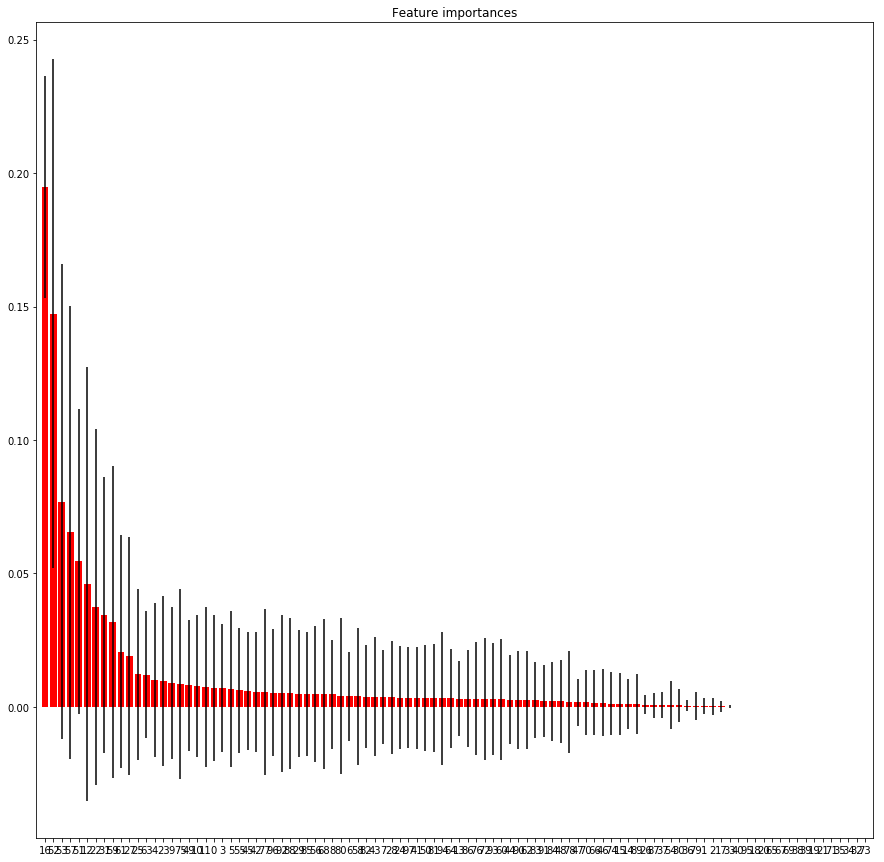

In [34]:
import matplotlib.pyplot as plt
forest = pmt

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(15,15))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()